In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
x_ind = df.drop('species',axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
x_norm = sc.fit_transform(x_ind)

In [9]:
y_dep = df['species']

In [10]:
x_norm

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# KMEANS

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans()

In [13]:
a=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_norm)
    a.append(kmeans.inertia_)

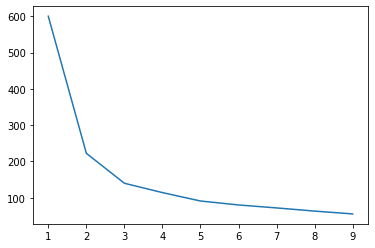

In [14]:
plt.plot(range(1,10),a)

# Clusters = 3

In [15]:
kmeans = KMeans(3)
kmeans.fit(x_norm)
k_pred = kmeans.predict(x_norm)
k_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [16]:
data = x_ind.copy()

In [17]:
data['clusters'] = k_pred

In [18]:
data

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

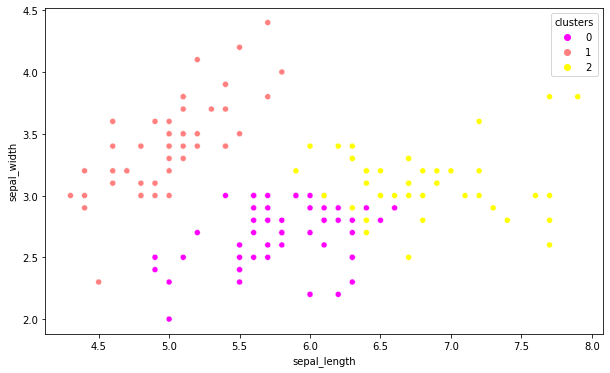

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['sepal_length'],y=data['sepal_width'],hue=data['clusters'],palette="spring")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

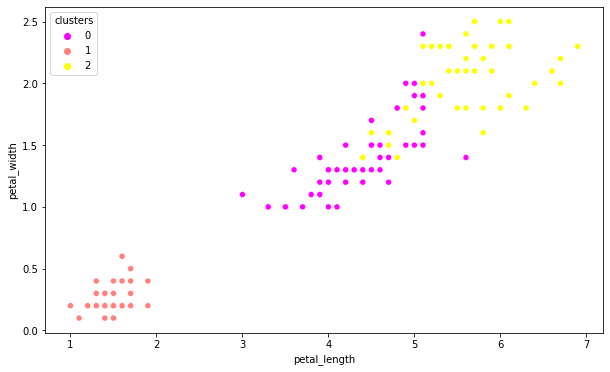

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['petal_length'],y=data['petal_width'],hue=data['clusters'],palette="spring")

In [21]:
x_ind = data.drop('clusters',axis=1)
y_dep = data['clusters']

# Decision Tree

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,random_state=1,test_size=0.1)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(random_state=5)

In [26]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [27]:
dt_pred = dt.predict(x_test)
dt_pred

array([1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0], dtype=int32)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
confusion_matrix(y_test,dt_pred)

array([[3, 0, 0],
       [0, 5, 0],
       [1, 0, 6]])

In [30]:
acc = accuracy_score(y_test,dt_pred)
round(acc * 100,2)

93.33

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
rf = RandomForestClassifier(random_state=8,n_estimators=50)

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=8)

In [60]:
rf_pred = rf.predict(x_test)

In [61]:
rf_pred

array([1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0], dtype=int32)

In [62]:
confusion_matrix(y_test,rf_pred)

array([[3, 0, 0],
       [0, 5, 0],
       [1, 0, 6]])

In [63]:
rf_acc = accuracy_score(y_test,rf_pred)

In [64]:
round(rf_acc,2)*100

93.0

# Polynomial

In [39]:
df1 = pd.read_csv('/home/vimalkumar/Downloads/insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [41]:
df1['sex'] = lb.fit_transform(df1['sex'])
df1['smoker'] = lb.fit_transform(df1['smoker'])
df1['region'] = lb.fit_transform(df1['region'])

In [42]:
x_ind = df1.drop('charges',axis=1)

In [43]:
y_dep = df1['charges']

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x_ind,y_dep,test_size=0.2,random_state=5)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(xtrain)
 


In [46]:
poly.fit(x_poly,ytrain)

PolynomialFeatures(degree=4)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x_poly,ytrain)

LinearRegression()

In [49]:
pred = model.predict(poly.fit_transform(xtest))

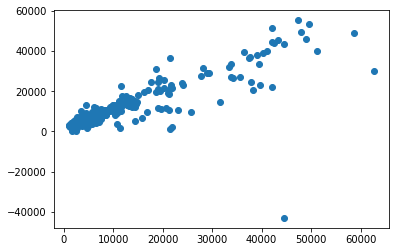

In [50]:
plt.scatter(ytest,pred)